<h3>Splitting the dataset (train:70%, val: 15%, test: 15%)</h3>

In [1]:
import os
import random
import shutil

images_dir = "../HRSID_JPG/JPEGImages"
labels_dir = "../YOLOaannotations"
train_dir = "../Data/train"
val_dir = "../Data/val"
test_dir = "../Data/test"

train_split_ratio = 0.7
val_split_ratio = 0.15
test_split_ratio = 0.15

def create_subdirectories(directory):
    os.makedirs(os.path.join(directory, "images"), exist_ok=True)
    os.makedirs(os.path.join(directory, "labels"), exist_ok=True)

create_subdirectories(train_dir)
create_subdirectories(val_dir)
create_subdirectories(test_dir)


def copy_files(image_files, label_files, dest_images_dir, dest_labels_dir):
    for image_file, label_file in zip(image_files, label_files):
        shutil.copy(image_file, os.path.join(dest_images_dir, os.path.basename(image_file)))
        shutil.copy(label_file, os.path.join(dest_labels_dir, os.path.basename(label_file)))

image_files = [os.path.join(images_dir, f) for f in os.listdir(images_dir) if f.endswith(".jpg")]
image_files.sort()
label_files = [os.path.join(labels_dir, f) for f in os.listdir(labels_dir) if f.endswith(".txt")]
label_files.sort()
combined = list(zip(image_files, label_files))
random.shuffle(combined)
image_files_shuffled, label_files_shuffled = zip(*combined)
num_images = len(image_files_shuffled)
num_train = int(num_images * train_split_ratio)
num_val = int(num_images * val_split_ratio)
num_test = num_images - num_train - num_val
train_images = image_files_shuffled[:num_train]
val_images = image_files_shuffled[num_train:num_train + num_val]
test_images = image_files_shuffled[num_train + num_val:]

train_labels = label_files_shuffled[:num_train]
val_labels = label_files_shuffled[num_train:num_train + num_val]
test_labels = label_files_shuffled[num_train + num_val:]

copy_files(train_images, train_labels, os.path.join(train_dir, "images"), os.path.join(train_dir, "labels"))
copy_files(val_images, val_labels, os.path.join(val_dir, "images"), os.path.join(val_dir, "labels"))
copy_files(test_images, test_labels, os.path.join(test_dir, "images"), os.path.join(test_dir, "labels"))
print("Dataset split completed successfully.")

Dataset split completed successfully.


<h3>Plotting the images with labels to verify that splitting happened properly</h3>

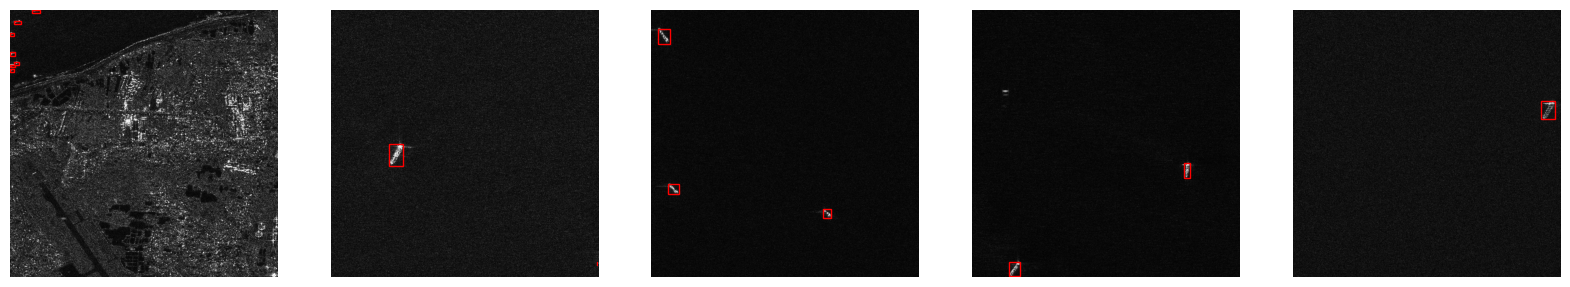

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

train_images_dir = "../Data/train/images"
train_labels_dir = "../Data/train/labels"
image_files = [os.path.join(train_images_dir, f) for f in os.listdir(train_images_dir) if f.endswith(".jpg")]
num_images_to_plot = 5
selected_images = random.sample(image_files, num_images_to_plot)


def yolo_to_mpl(bbox, image_width, image_height):
    x_center, y_center, width, height = bbox
    x_min = (x_center - width/2) * image_width
    y_min = (y_center - height/2) * image_height
    box_width = width * image_width
    box_height = height * image_height
    return x_min, y_min, box_width, box_height

def plot_images_with_boxes(image_files):
    fig, axes = plt.subplots(1, len(image_files), figsize=(20, 10))

    for i, image_file in enumerate(image_files):
        image = Image.open(image_file)
        image_width, image_height = image.size
        axes[i].imshow(image)
        label_file = os.path.join(train_labels_dir, os.path.splitext(os.path.basename(image_file))[0] + ".txt")
        with open(label_file, 'r') as f:
            for line in f:
                class_idx, x_center, y_center, width, height = map(float, line.strip().split())
                bbox = yolo_to_mpl((x_center, y_center, width, height), image_width, image_height)
                rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none')
                axes[i].add_patch(rect)

        axes[i].axis('off')

    plt.show()
plot_images_with_boxes(selected_images)
